33/33 [==============================] - 0s 1ms/step
Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_25 (Dense)            (None, 64)                128       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_25 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_25 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_25 (TFOp  (None,)                  0         
 Lamb

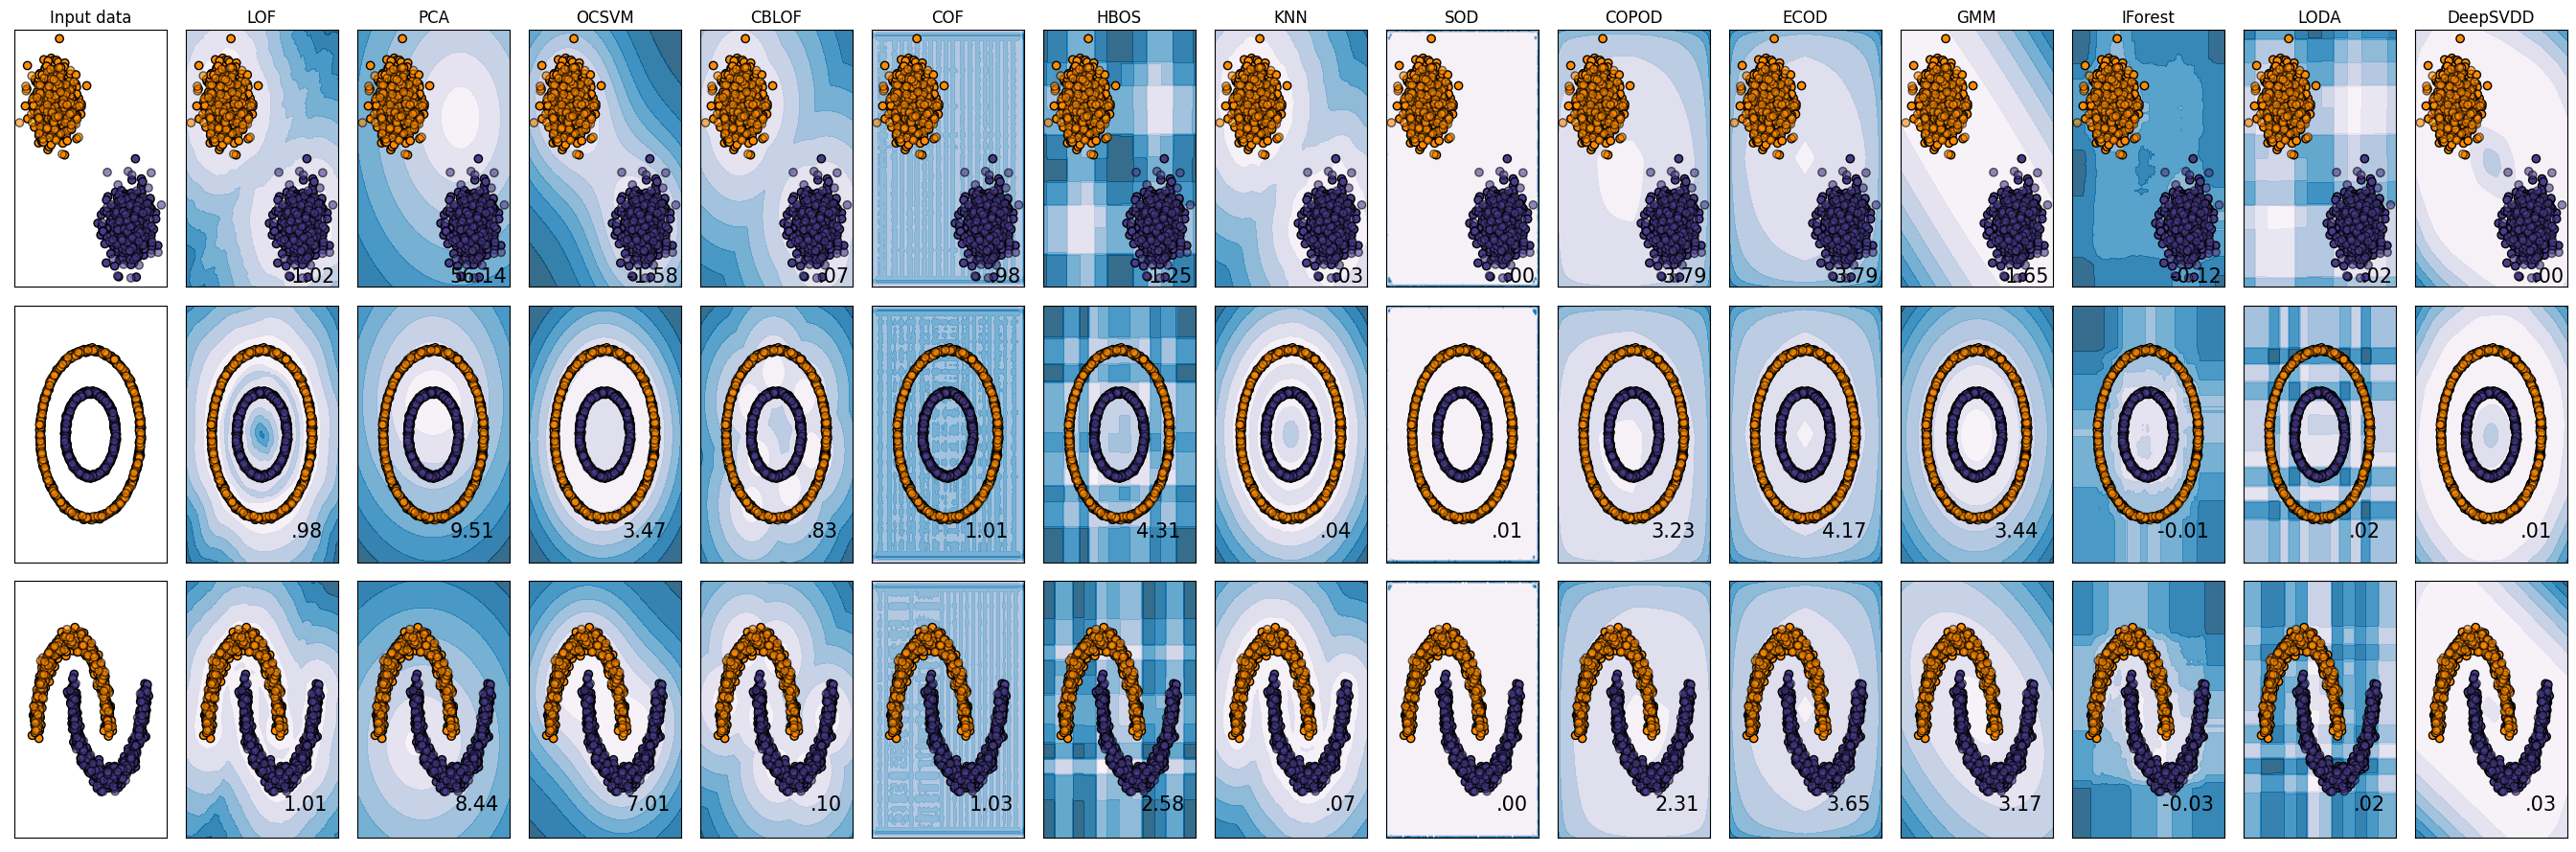

In [15]:
#Import required libraries
import numpy as np
np.random.seed(42) # replace 42 with any integer value
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles,make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
# Import Unsupervised outlier detection models from the pyod package
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.sod import SOD
from pyod.models.copod import COPOD
from pyod.models.ecod import ECOD
from pyod.models.gmm import GMM
from pyod.models.iforest import IForest
from pyod.models.loda import LODA
from pyod.models.deep_svdd import DeepSVDD
# Create a list of names corresponding to the outlier detection models
names = [
    "LOF",
    "PCA",
    "OCSVM",
    "CBLOF",
    "COF",
    "HBOS",
    "KNN",
    "SOD",
    "COPOD",
    "ECOD",
    "GMM",
    "IForest",
    "LODA",
    "DeepSVDD",
   
]
# Create a list of outlier detection classifiers
classifiers = [
   
    LOF(),
    PCA(),
    OCSVM(),
    CBLOF(),
    COF(),
    HBOS(),
    KNN(),
    SOD(),
    COPOD(),
    ECOD(),
    GMM(),
    IForest(),
    LODA(),
    DeepSVDD(),
]

# Create a list of datasets
datasets = [make_blobs(n_samples=1500, n_features=2, centers=2, random_state=42),
            make_circles(n_samples=1500,noise=0.01, factor=0.5, random_state=42),
            make_moons(n_samples=1500,noise=0.05, random_state=42),]

# Set the figure size and create a new figure
figure = plt.figure(figsize=(27,9))
# Initialize a counter variable for the subplots
i = 1
# Iterate over the datasets
for ds_cnt, ds in enumerate(datasets):
     # Preprocess the dataset and split it into training and test parts
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    # Determine the minimum and maximum values for the x and y axes
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # # Create a color map and a bright version of the same color map
    cm = plt.cm.PuBu
    cm_bright = ListedColormap(["#FF8C00", "#483D8B"])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points in the subplot
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points in the subplot
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Loop through each classifier and create a subplot for the classifier's output
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          # Create a pipeline with a StandardScaler and the classifier
        clf = make_pipeline(StandardScaler(), clf)
        # Fit the pipeline to the training data
        clf.fit(X_train)
        # Get the outlier score by using the decision function values for the training data
        score = clf.decision_function(X_train)
        # Create a decision boundary display for the classifie
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

       # Plot the training points 
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points 
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        # Set the title of the subplot to the name of the classifier
        if ds_cnt == 0:
            ax.set_title(name)
         # Display the score of the classifier as text in the top right corner of the subplot
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score[0]).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
#Adjust the layout of the subplots to optimize spacing and display the plot
plt.tight_layout()
plt.show()

